## Iris Dataset

![iris](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

**Predicted attribute:** class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

**Attribute Information:**
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

Source: https://archive.ics.uci.edu/ml/datasets/Iris

## Configuraciones iniciales e instalación de paquetes

In [75]:
options(repr.plot.width=6, repr.plot.height=6, scipen = 999, warn = -1)

list.of.packages <- c('ggplot2', 'ggthemes', 'GGally', 'VIM', 'mice', 'corrplot', 'caret', 'caretEnsemble', 'mlbench', 'gbm', 
                     'FSelector', 'AppliedPredictiveModeling', 'C50', 'ipred', 'kernlab')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cloud.r-project.org/")

library(ggplot2)
library(ggthemes)
library(GGally)
library(mice)
library(VIM)
library(corrplot)
library(caret)
library(caretEnsemble)
library(mlbench)
library(gbm)
library(FSelector)
library(AppliedPredictiveModeling)
library(C50)
library(ipred)
library(kernlab)

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpILqpfV\downloaded_packages



Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



## Carga de datos

El dataset Iris viene integrado en R. Y se encuentra en la variable "iris".

In [5]:
data(iris)

## Exploración de datos

In [6]:
str(iris)
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


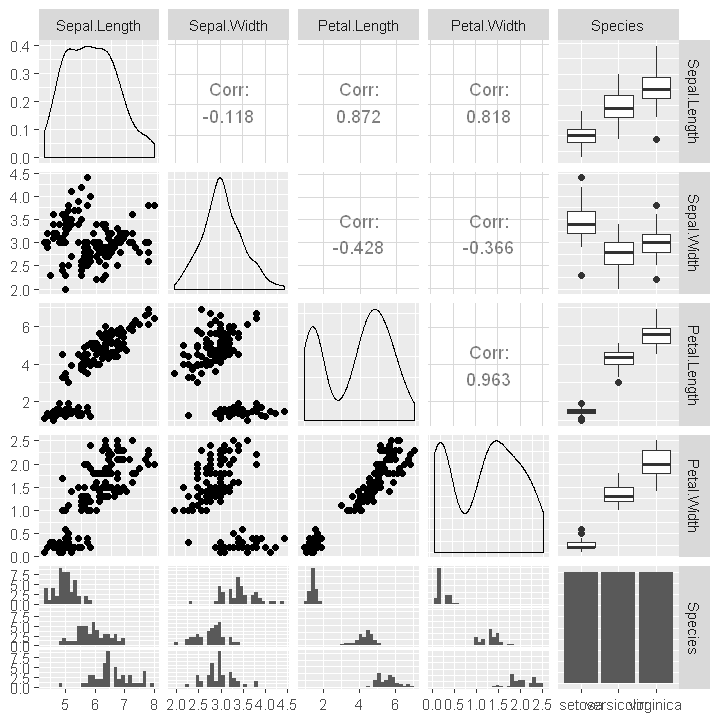

In [7]:
ggpairs(data = iris)

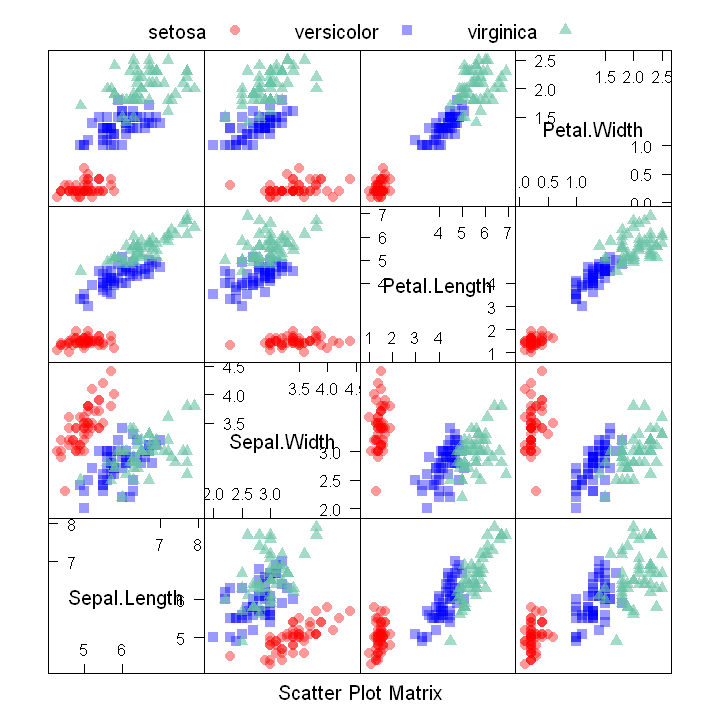

In [11]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

    Se puede ver la especie Setosa se encuentra un poco alejado de los demás grupos. Sin embargo, no es clara la frontera de decisión entre Versicolor y Virginica.

## Exploración de datos faltantes

Warning message in hex(RGB(r, g, b), gamma = gamma, fixup = fixup, ...):
"'gamma' is deprecated and has no effect"Warning message in hex(RGB(r, g, b), gamma = gamma, fixup = fixup, ...):
"'gamma' is deprecated and has no effect"Warning message in hex(RGB(r, g, b), gamma = gamma, fixup = fixup, ...):
"'gamma' is deprecated and has no effect"Warning message in hex(RGB(r, g, b), gamma = gamma, fixup = fixup, ...):
"'gamma' is deprecated and has no effect"Warning message in hex(RGB(r, g, b), gamma = gamma, fixup = fixup, ...):
"'gamma' is deprecated and has no effect"

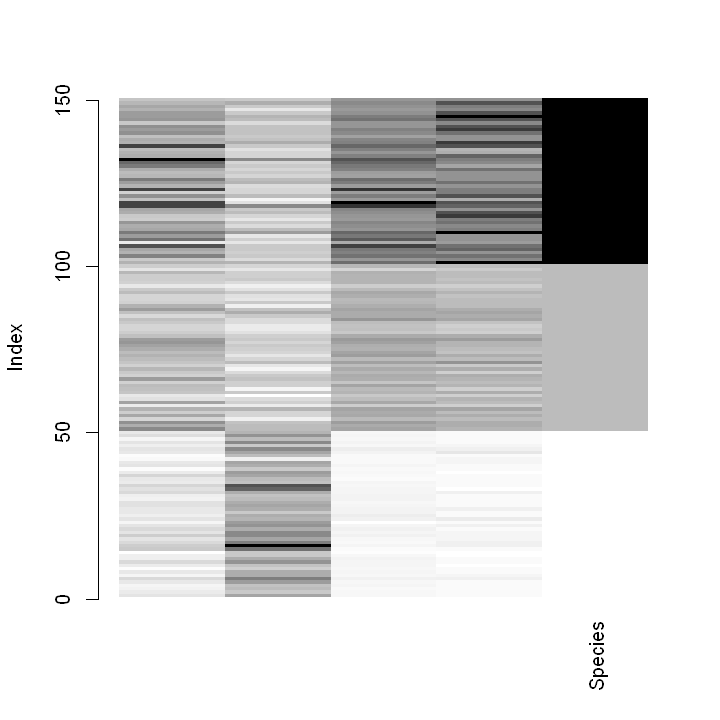

In [12]:
matrixplot(iris, interactive = F, sortby = "Species")

Otra opción es utilizar el paquete VIM y la función aggr.

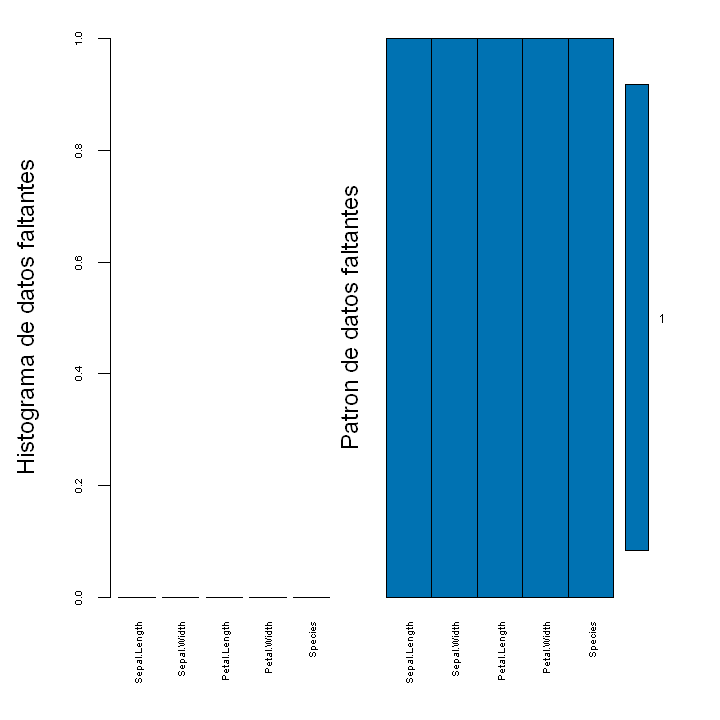

In [10]:
aggr(iris, digits = 3, numbers = TRUE, labels = names(iris), cex.axis = .5, cex.numbers = .6,
       gap = 2, ylabs = c("Histograma de datos faltantes", "Patron de datos faltantes"), col = c('#0072B2', '#D55E00'))

    No hay datos faltantes en el dataset.

## Correlaciones

In [13]:
corr<- cor(iris[, 1:4])

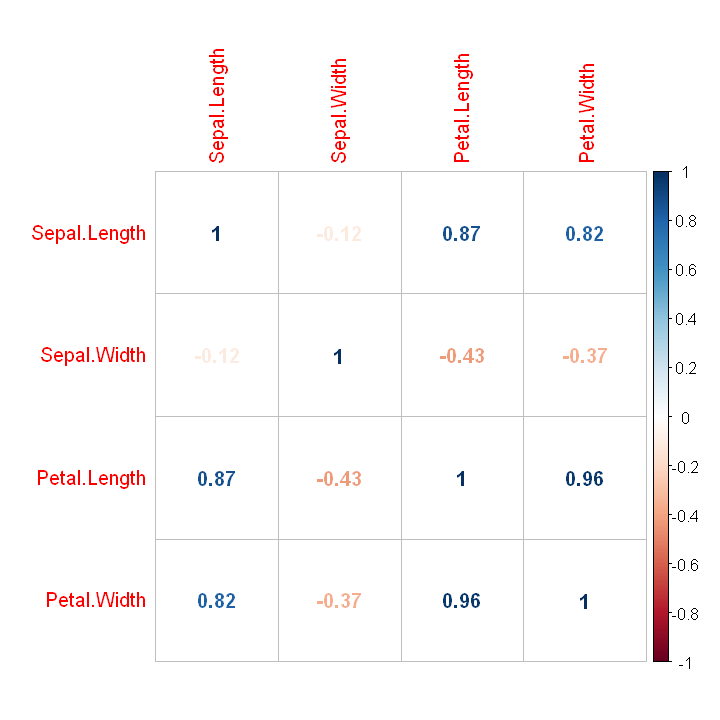

In [14]:
corrplot(corr, method="number")

    El correlograma nos muestra que Sepal.Width es el atributo que menos correlacion tiene con las demás variables.

### Importancia de atributos
El paquete FSelector nos ayuda a identificar cuales son los atributos con mayor poder predictivo con respecto a la variable de salida.

In [25]:
res <- information.gain(Species ~ ., data = iris)
res

,attr_importance
Sepal.Length,0.4521286
Sepal.Width,0.2672750
Petal.Length,0.9402853
Petal.Width,0.9554360


## Machine Learning

In [44]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

Particionamos el dataset en 80% para entrenar el modelo y 20% para probarlo.

In [30]:
set.seed(245)

trainIndex <- createDataPartition(iris$Species, p = .8, list = FALSE, times = 1)
irisTrain <- iris[ trainIndex,]
irisTest  <- iris[-trainIndex,]

str(irisTrain)
str(irisTest)

prop.table(table(irisTrain$Species))
prop.table(table(irisTest$Species))

'data.frame':	120 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 4.6 5 4.4 4.9 5.4 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.4 3.4 2.9 3.1 3.7 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.4 1.5 1.4 1.5 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.3 0.2 0.2 0.1 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	30 obs. of  5 variables:
 $ Sepal.Length: num  5.4 5.4 5.1 5.1 5 5.2 5.2 5 4.9 5.1 ...
 $ Sepal.Width : num  3.9 3.9 3.8 3.7 3.4 3.4 4.1 3.2 3.6 3.8 ...
 $ Petal.Length: num  1.7 1.3 1.5 1.5 1.6 1.4 1.5 1.2 1.4 1.9 ...
 $ Petal.Width : num  0.4 0.4 0.3 0.4 0.4 0.2 0.1 0.2 0.1 0.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 


    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Utilizando el paquete caret nos aseguramos de que las proporciones de clases se mantengan en el test set al igual que el training set.

### Entrenamiento del modelo

#### Algoritmos de boosting
Consiste en construir modelos (tipicamente del mismo tipo) en donde cada uno aprende a arreglar los errores de predicción a partir de un modelo anterior en la cadena.

En primer lugar utilizaremos los algoritmos con boosting: C5.0 y Stochastic Gradient Boosting (gbm)

In [31]:
#Inicializamos algunos parámetros
control <- trainControl(method = "repeatedcv", number = 10, repeats = 10)
seed <- 7
metric <- "Accuracy"


Call:
summary.resamples(object = boosting_results)

Models: c5.0, gbm 
Number of resamples: 30 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
c5.0 0.8333  0.9167      1 0.9583       1    1    0
gbm  0.8333  0.9167      1 0.9611       1    1    0

Kappa 
     Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
c5.0 0.75   0.875      1 0.9375       1    1    0
gbm  0.75   0.875      1 0.9417       1    1    0


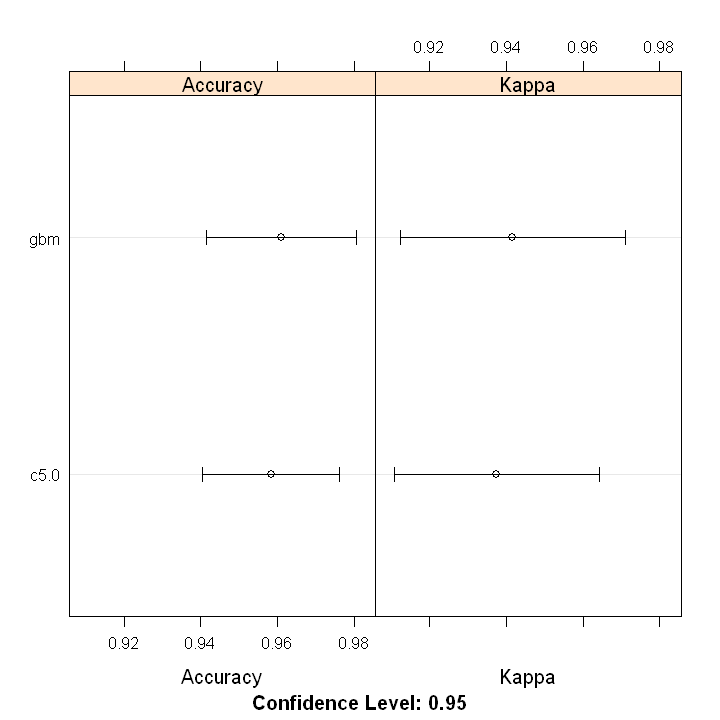

In [42]:
# C5.0
set.seed(seed)
fit.c50 <- train(Species~., data = irisTrain, method="C5.0", metric=metric, trControl=control)

# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(Species~., data = irisTrain, method="gbm", metric=metric, trControl=control, verbose=FALSE)

# Resumen de resultados
boosting_results <- resamples(list(c5.0=fit.c50, gbm=fit.gbm))
summary(boosting_results)
dotplot(boosting_results)

In [43]:
#Resultados en el test set

predictions <- predict(fit.c50, irisTest[, -5])
mean(predictions == irisTest[, 5])

predictions <- predict(fit.gbm, irisTest[, -5])
mean(predictions == irisTest[, 5])

[1] 0.9

[1] 0.9

### Bagging algorithms
Consiste en construir multiples modelos (tipicamente del mismo tipo) a partir de diferentes submuestras del conjunto de entrenamiento.

Los algoritmos de bagging que vamos a utilizar son: Bagged CART y el popular Random Forest

Loading required package: e1071
Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
summary.resamples(object = bagging_results)

Models: treebag, rf 
Number of resamples: 30 

Accuracy 
          Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
treebag 0.8333  0.9167      1 0.9611       1    1    0
rf      0.8333  0.9167      1 0.9722       1    1    0

Kappa 
        Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
treebag 0.75   0.875      1 0.9417       1    1    0
rf      0.75   0.875      1 0.9583       1    1    0


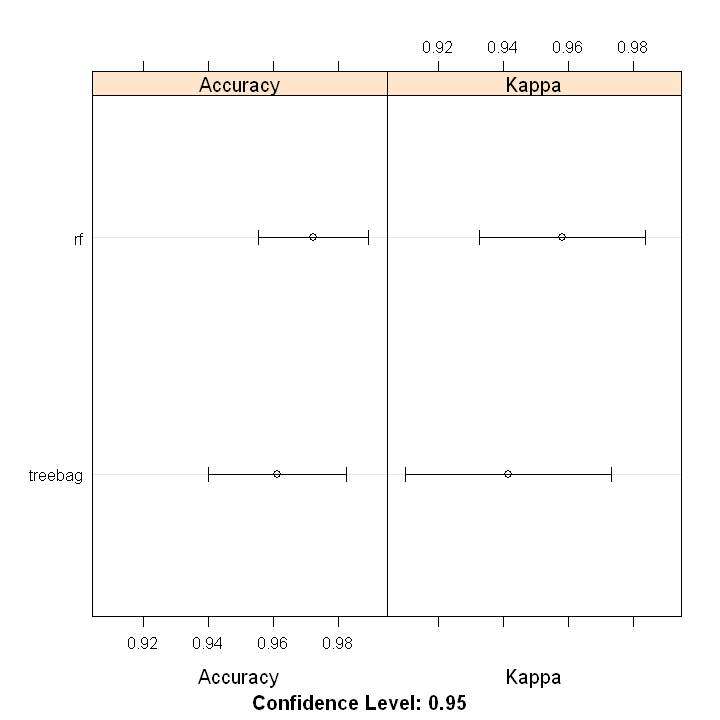

In [46]:
## Inicializamos algunos parámetros
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
seed <- 7
metric <- "Accuracy"

# Bagged CART
set.seed(seed)
fit.treebag <- train(Species~., data=irisTrain, method="treebag", metric=metric, trControl=control)

# Random Forest
set.seed(seed)
fit.rf <- train(Species~., data=irisTrain, method="rf", metric=metric, trControl=control)

# Resumen de resultados
bagging_results <- resamples(list(treebag=fit.treebag, rf=fit.rf))
summary(bagging_results)
dotplot(bagging_results)

In [47]:
predictions <- predict(fit.treebag, irisTest[, -5])
mean(predictions == irisTest[, 5])

predictions <- predict(fit.rf, irisTest[, -5])
mean(predictions == irisTest[, 5])

[1] 0.9

[1] 0.9

### Stacking algorithms
Consiste en construir multiples modelos (tipicamente de distintos tipos) y un modelo supervisor que aprende a combinar de la mejor forma las predicciones de los modelos primarios.

Creamos 5 submodelos:


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0986             nan     0.1000    0.2581
     2        0.8944             nan     0.1000    0.2142
     3        0.7435             nan     0.1000    0.1781
     4        0.6234             nan     0.1000    0.1304
     5        0.5310             nan     0.1000    0.1045
     6        0.4571             nan     0.1000    0.0756
     7        0.3960             nan     0.1000    0.0717
     8        0.3456             nan     0.1000    0.0599
     9        0.3032             nan     0.1000    0.0582
    10        0.2662             nan     0.1000    0.0435
    20        0.0886             nan     0.1000    0.0099
    40        0.0257             nan     0.1000    0.0007
    60        0.0109             nan     0.1000   -0.0004
    80        0.0062             nan     0.1000   -0.0008
   100        0.0071             nan     0.1000   -0.0007
   120        0.0025             nan     0.1000   -0.0008
   140        


Call:
summary.resamples(object = results)

Models: rpart, knn, treebag, gbm, C5.0, rf 
Number of resamples: 30 

Accuracy 
          Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
rpart   0.6667  0.9167      1 0.9472       1    1    0
knn     0.9167  1.0000      1 0.9833       1    1    0
treebag 0.8333  0.9167      1 0.9667       1    1    0
gbm     0.8333  0.9167      1 0.9667       1    1    0
C5.0    0.8333  0.9167      1 0.9583       1    1    0
rf      0.9167  0.9167      1 0.9750       1    1    0

Kappa 
         Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
rpart   0.500   0.875      1 0.9208       1    1    0
knn     0.875   1.000      1 0.9750       1    1    0
treebag 0.750   0.875      1 0.9500       1    1    0
gbm     0.750   0.875      1 0.9500       1    1    0
C5.0    0.750   0.875      1 0.9375       1    1    0
rf      0.875   0.875      1 0.9625       1    1    0


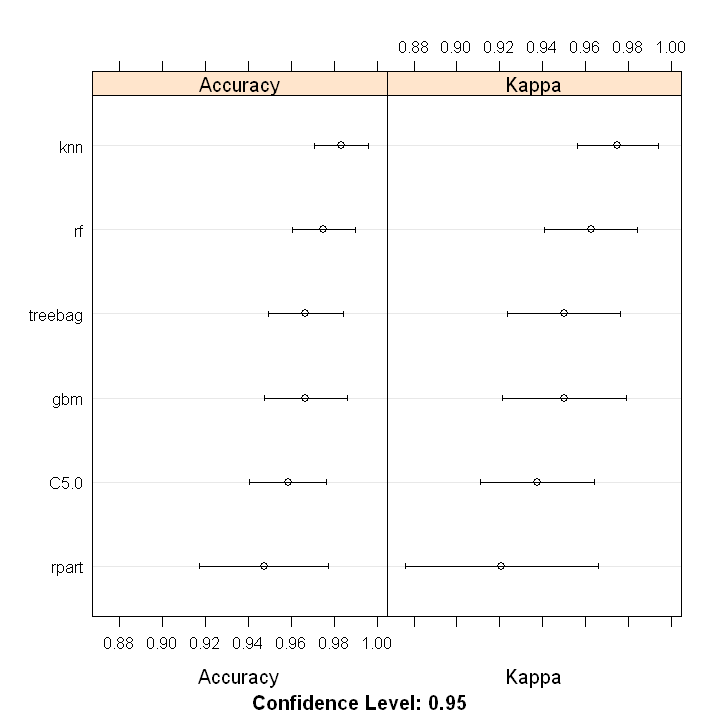

In [55]:
# Creamos los submodelos
seed <- 7
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)
algorithmList <- c('rpart', 'knn', 'treebag', 'gbm', 'C5.0', 'rf')
set.seed(seed)
models <- caretList(Species~., data= irisTrain, trControl=control, methodList=algorithmList)
results <- resamples(models)
summary(results)
dotplot(results)

,rpart,knn,treebag,gbm,C5.0,rf
rpart,1.0000000,0.1933697,0.3428358,0.3107214,0.2811493,0.3299017
knn,0.1933697,1.0000000,0.6922187,0.7637626,0.5923489,0.4000661
treebag,0.3428358,0.6922187,1.0000000,0.9063270,0.6417938,0.8406511
gbm,0.3107214,0.7637626,0.9063270,1.0000000,0.5816751,0.7619048
C5.0,0.2811493,0.5923489,0.6417938,0.5816751,1.0000000,0.4524139
rf,0.3299017,0.4000661,0.8406511,0.7619048,0.4524139,1.0000000


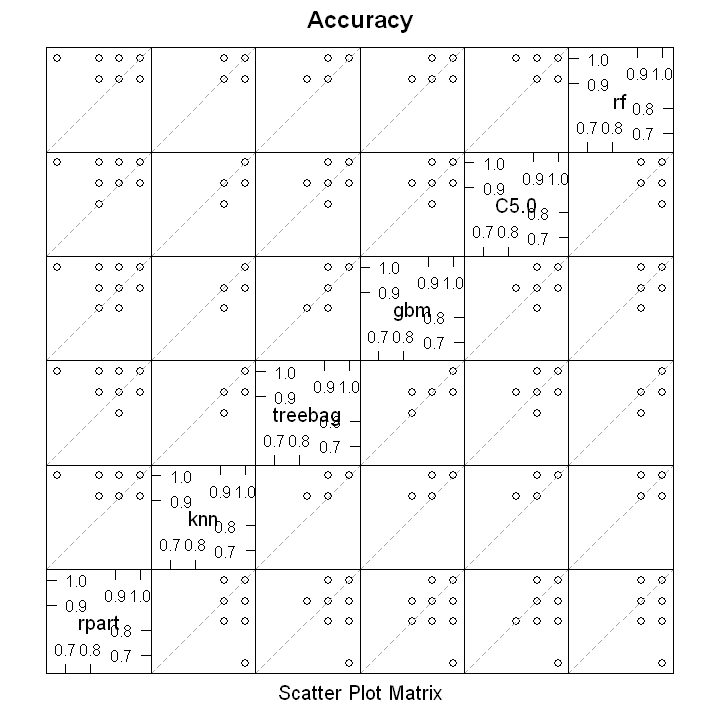

In [56]:
# correlation between results
modelCor(results)
splom(results)

In [57]:
ll <- lapply(models, function(x) {
    
    predictions <- predict(x, irisTest[,-5])
    cat(x[['method']], ":", round(mean(irisTest[, 5] == predictions)*100,2), '%\n')
    })

invisible(ll)

rpart : 90 %
knn : 93.33 %
treebag : 90 %
gbm : 90 %
C5.0 : 90 %
rf : 90 %


In [78]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

set.seed(245)

gbmFit1 <- train(Species ~ ., data = irisTrain, 
                 method = "gbm", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = FALSE)
gbmFit1

Stochastic Gradient Boosting 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa  
  1                   50      0.9675000  0.95125
  1                  100      0.9691667  0.95375
  1                  150      0.9625000  0.94375
  2                   50      0.9641667  0.94625
  2                  100      0.9600000  0.94000
  2                  150      0.9583333  0.93750
  3                   50      0.9608333  0.94125
  3                  100      0.9583333  0.93750
  3                  150      0.9533333  0.93000

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using  the largest value.
The final va

In [85]:
gbmGrid <-  expand.grid(interaction.depth = c(7, 9), 
                        n.trees = (1:30)*20, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
                        
nrow(gbmGrid)

set.seed(825)
gbmFit2 <- train(Species ~ ., data = irisTrain, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit2

[1] 60

Stochastic Gradient Boosting 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa  
  7                   20      0.9491667  0.92375
  7                   40      0.9500000  0.92500
  7                   60      0.9541667  0.93125
  7                   80      0.9525000  0.92875
  7                  100      0.9525000  0.92875
  7                  120      0.9525000  0.92875
  7                  140      0.9525000  0.92875
  7                  160      0.9500000  0.92500
  7                  180      0.9500000  0.92500
  7                  200      0.9508333  0.92625
  7                  220      0.9533333  0.93000
  7                  240      0.9541667  0.93125
  7                  260      0.9541667  0.93125
  7                  280

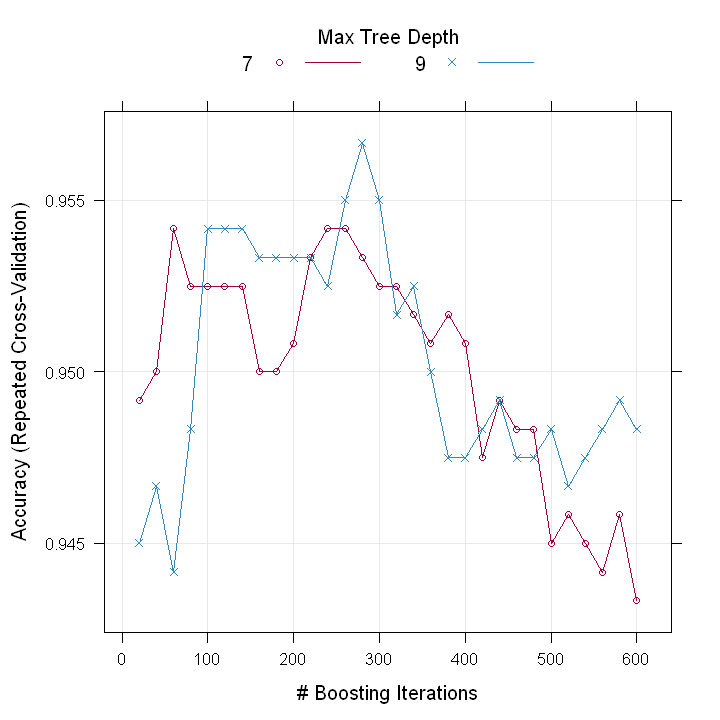

In [86]:
trellis.par.set(caretTheme())
plot(gbmFit2) 

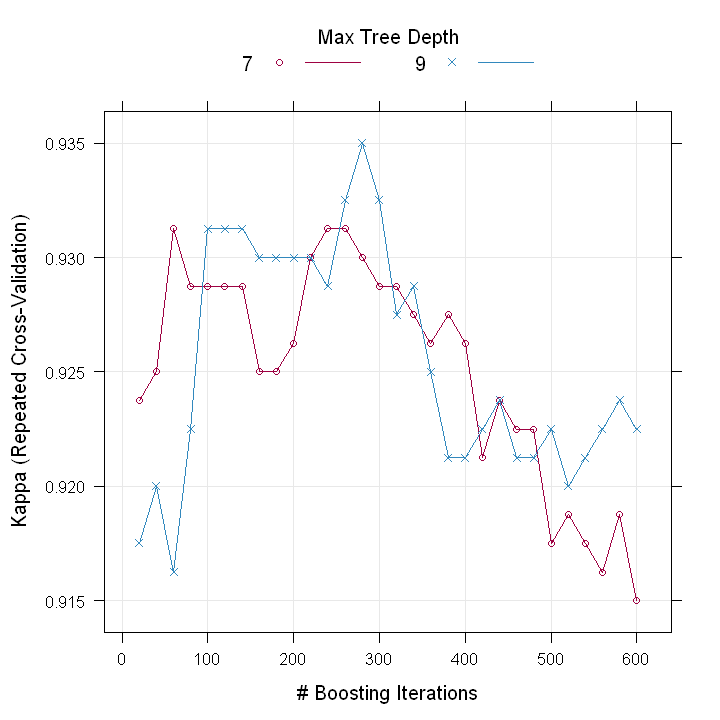

In [87]:
trellis.par.set(caretTheme())
plot(gbmFit2, metric = "Kappa")

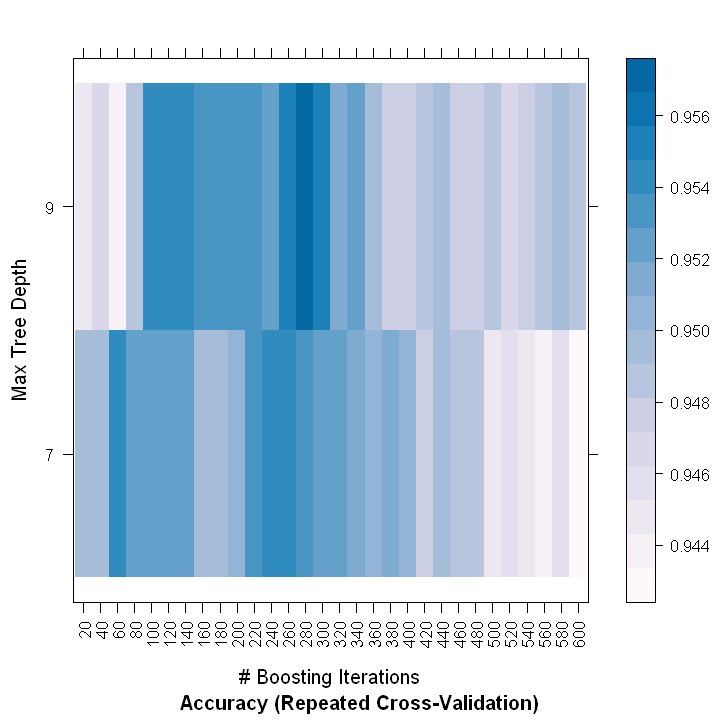

In [89]:
trellis.par.set(caretTheme())
plot(gbmFit2, metric = "Accuracy", plotType = "level",
     scales = list(x = list(rot = 90)))

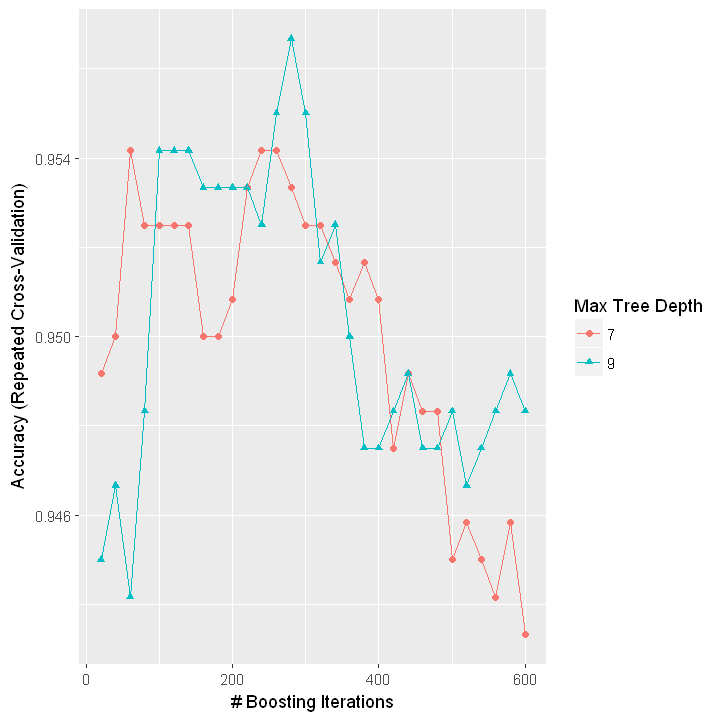

In [90]:
ggplot(gbmFit2)  